# Analysis 3:


# Finding the busiest airports in descending order and displaying the number of departed/arrived flights through the airport for the top five busiest airports

/Users/Sneha/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Sneha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:31: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


  Airport_code  Total_number_of_flights                            airport  \
0          ORD                   211775       Chicago O'Hare International   
1          ATL                   197320  William B Hartsfield-Atlanta Intl   
2          DFW                   183262    Dallas-Fort Worth International   
3          LAX                   131512          Los Angeles International   
4          PHX                   111128   Phoenix Sky Harbor International   

                city state country        lat        long  
0            Chicago    IL     USA  41.979595  -87.904464  
1            Atlanta    GA     USA  33.640444  -84.426944  
2  Dallas-Fort Worth    TX     USA  32.895951  -97.037200  
3        Los Angeles    CA     USA  33.942536 -118.408074  
4            Phoenix    AZ     USA  33.434167 -112.008056  


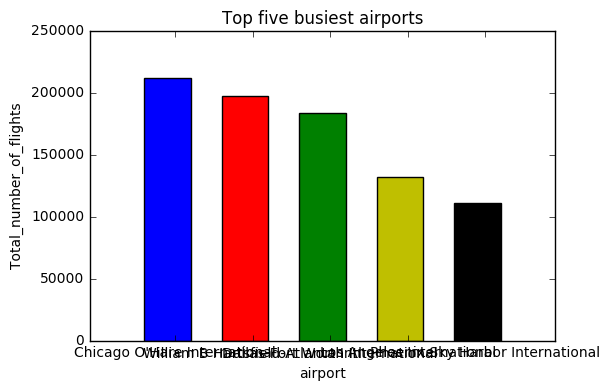

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle, islice


loc= '/Users/Sneha/Downloads/Final_dataset.csv'
data = pd.read_csv(loc)
#Filling the nan with zeroes for the below two columns
data['DepTime'].fillna(0,inplace=True)
data['ArrTime'].fillna(0,inplace=True)
##Convert the columns to int
data.DepTime=data.DepTime.astype(int)
data.ArrTime=data.DepTime.astype(int)

#Picking up the required columns
req_data=data[["Origin", "Dest"]]

#Performing groupby on both Origin and Destination column seperately
r1=req_data.groupby(["Origin"]).size().reset_index()
r1.rename(columns={0: 'Size_Origin'}, inplace=True)
#print(r1)
r2=req_data.groupby(["Dest"]).size().reset_index()
r2.rename(columns={0: 'Size_Dest'}, inplace=True)
#print(r2)

#Merging two dataframes
result=pd.merge(r1, r2, left_on='Origin', right_on='Dest')
result["Summation"] = result["Size_Origin"].add(result["Size_Dest"])
#Sorting the summation column in descending order
df=result.sort(['Summation'], ascending=False)

#reading the second excel and putting it in a dataframe
code_number='/Users/Sneha/Downloads/airports.csv'
new_excel=pd.read_csv(code_number)
#print(new_excel.head())

#Merging two dataframes based on the key column
final=pd.merge(df, new_excel, left_on='Origin', right_on='iata')
final.rename(columns={'Origin': 'Airport_code','Summation': 'Total_number_of_flights'}, inplace=True)

#Choosing the columns to be in the final output
final_result=final[['Airport_code','Total_number_of_flights','airport','city','state','country','lat','long']]
air=final_result.head()
print(air)
#Writing to csv file
final_result.to_csv("output_Analysis_3.csv",index = False)

#Bar plot for the analysis
fig,ax = plt.subplots()
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']),  len(air))) #Specifying the colours
ax.bar(air.index, air.Total_number_of_flights, align='center', width=0.6, color=my_colors)
ax.set_xticks(air.index+0.1)
ax.set_xticklabels(air.airport)

#To save the image
plt.savefig('/Users/Sneha/Downloads/Plot_Analysis_3.png')
#Plotting title
plt.xlabel('airport')
plt.ylabel('Total_number_of_flights')
plt.title('Top five busiest airports')

plt.show()